Erdos-Renyi Model and Binomial Degree Distribution

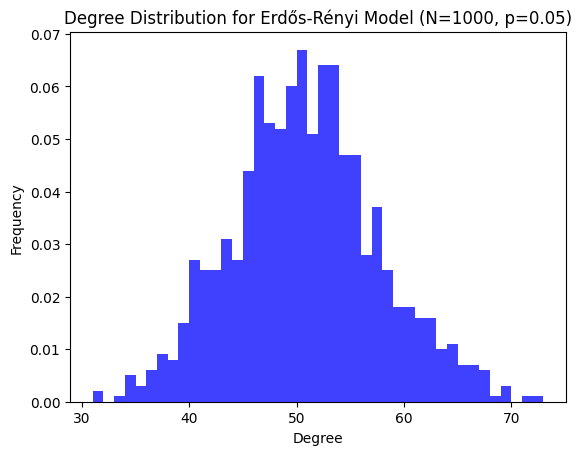

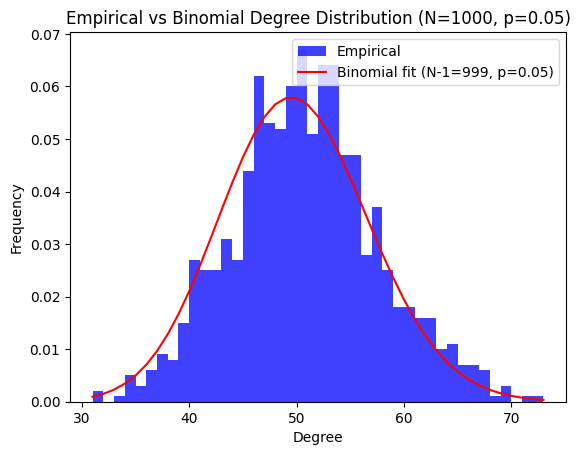

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def erdos_renyi(N, p):
    G = nx.erdos_renyi_graph(N, p)
    return G

def degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    return degrees

N = 1000
p = 0.05

G = erdos_renyi(N, p)

degrees = degree_distribution(G)

plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), density=True, alpha=0.75, color='blue')
plt.title(f"Degree Distribution for Erdős-Rényi Model (N={N}, p={p})")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xscale('linear')
plt.yscale('linear')
plt.show()

k = np.arange(min(degrees), max(degrees)+1)
binomial_pmf = binom.pmf(k, N-1, p)

plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), density=True, alpha=0.75, color='blue', label='Empirical')
plt.plot(k, binomial_pmf, 'r-', label=f'Binomial fit (N-1={N-1}, p={p})')
plt.title(f"Empirical vs Binomial Degree Distribution (N={N}, p={p})")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Watts-Strogatz Model and Small-World Properties

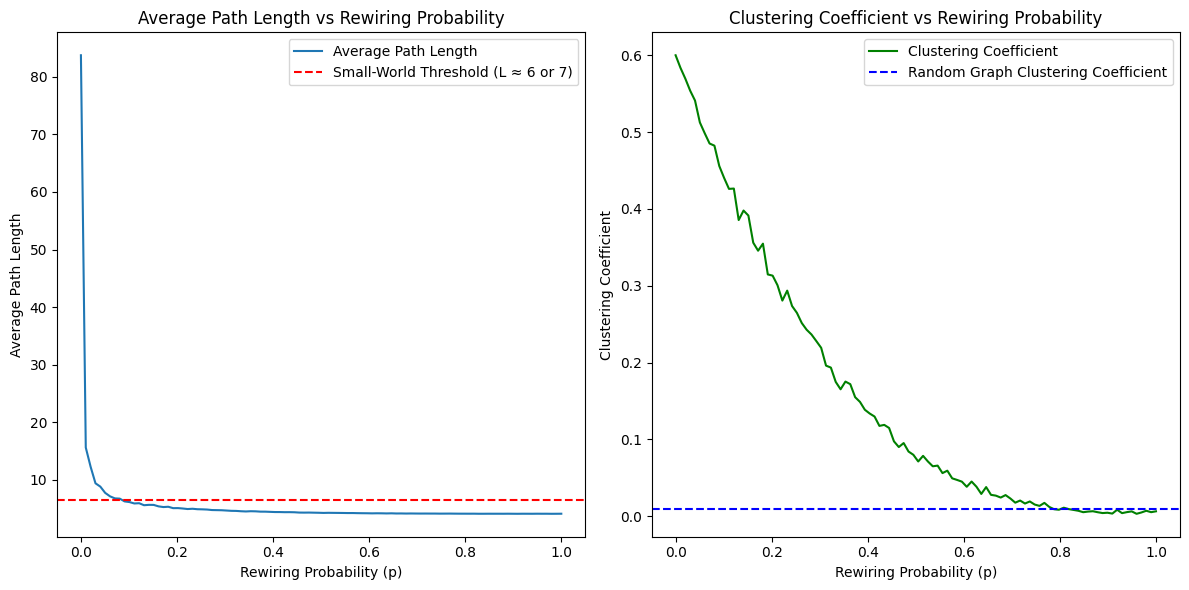

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def watts_strogatz(N, k, p):
    G = nx.watts_strogatz_graph(N, k, p)
    return G

def average_path_length(G):
    return nx.average_shortest_path_length(G)

def clustering_coefficient(G):
    return nx.average_clustering(G)

N = 1000
k = 6
p_values = np.linspace(0, 1, 100)


avg_path_lengths = []
clustering_coeffs = []

for p in p_values:
    G = watts_strogatz(N, k, p)
    avg_path_lengths.append(average_path_length(G))
    clustering_coeffs.append(clustering_coefficient(G))


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(p_values, avg_path_lengths, label='Average Path Length')
plt.axhline(y=6.5, color='r', linestyle='--', label='Small-World Threshold (L ≈ 6 or 7)')
plt.title('Average Path Length vs Rewiring Probability')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Path Length')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(p_values, clustering_coeffs, label='Clustering Coefficient', color='green')
plt.axhline(y=0.01, color='b', linestyle='--', label='Random Graph Clustering Coefficient')
plt.title('Clustering Coefficient vs Rewiring Probability')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Clustering Coefficient')
plt.legend()

plt.tight_layout()
plt.show()

Albert-Barabasi Model and Power-Law Degree Distribution

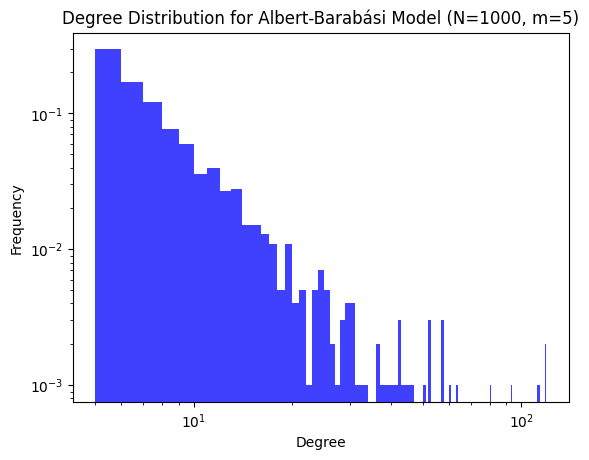

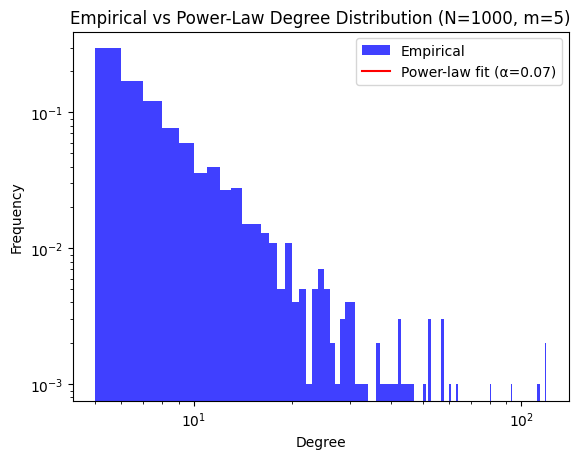

Fitted Power-Law Exponent: α = 0.07
Top 5 nodes by Betweenness Centrality:
Node 0: Betweenness Centrality = 86278.0000
Node 6: Betweenness Centrality = 85111.0000
Node 10: Betweenness Centrality = 79710.0000
Node 2: Betweenness Centrality = 78279.0000
Node 1: Betweenness Centrality = 59134.0000


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import powerlaw
import heapq

def albert_barabasi(N, m):
    G = nx.barabasi_albert_graph(N, m)
    return G

def degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    return degrees

def dijkstra(G, source):
    distances = {node: float('inf') for node in G.nodes()}
    distances[source] = 0
    priority_queue = [(0, source)]
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        if current_distance > distances[current_node]:
            continue
        for neighbor, weight in G[current_node].items():
            distance = current_distance + 1
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    return distances

def betweenness_centrality(G):
    centrality = {node: 0 for node in G.nodes()}
    for node in G.nodes():
        distances = dijkstra(G, node)
        for target in G.nodes():
            if node != target:
                for neighbor in G.neighbors(target):
                    if distances[neighbor] + 1 == distances[target]:
                        centrality[neighbor] += 1
    return centrality

N = 1000
m = 5

G = albert_barabasi(N, m)

degrees = degree_distribution(G)

plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), density=True, alpha=0.75, color='blue')
plt.title(f"Degree Distribution for Albert-Barabási Model (N={N}, m={m})")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xscale('log')
plt.yscale('log')
plt.show()

fit_alpha, *_ = powerlaw.fit(degrees)

plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), density=True, alpha=0.75, color='blue', label='Empirical')
x = np.arange(min(degrees), max(degrees))
y = powerlaw.pdf(x, fit_alpha)
plt.plot(x, y, 'r-', label=f'Power-law fit (α={fit_alpha:.2f})')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Empirical vs Power-Law Degree Distribution (N={N}, m={m})")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(f"Fitted Power-Law Exponent: α = {fit_alpha:.2f}")

centrality = betweenness_centrality(G)

top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by Betweenness Centrality:")
for node, centrality_value in top_nodes:
    print(f"Node {node}: Betweenness Centrality = {centrality_value:.4f}")


Ranking Nodes by Betweenness Centrality

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


def betweenness_centrality_ranking(G):
    betweenness = nx.betweenness_centrality(G)

    sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

    return sorted_betweenness


N = 1000
m = 5
G = nx.barabasi_albert_graph(N, m)


ranked_nodes = betweenness_centrality_ranking(G)

print("Top 10 nodes by Betweenness Centrality:")
for node, centrality in ranked_nodes[:10]:
    print(f"Node {node}: Betweenness Centrality = {centrality:.4f}")

Top 10 nodes by Betweenness Centrality:
Node 6: Betweenness Centrality = 0.0862
Node 0: Betweenness Centrality = 0.0853
Node 10: Betweenness Centrality = 0.0849
Node 9: Betweenness Centrality = 0.0606
Node 13: Betweenness Centrality = 0.0458
Node 8: Betweenness Centrality = 0.0423
Node 3: Betweenness Centrality = 0.0370
Node 19: Betweenness Centrality = 0.0341
Node 7: Betweenness Centrality = 0.0339
Node 17: Betweenness Centrality = 0.0327
